프레임에서 반복적으로 추적하는 예제입니다.

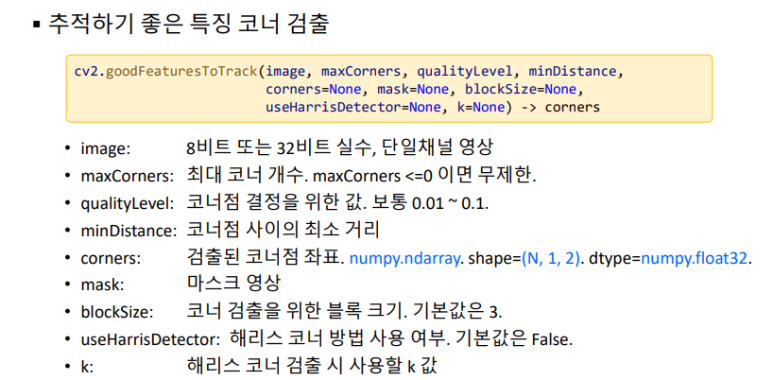

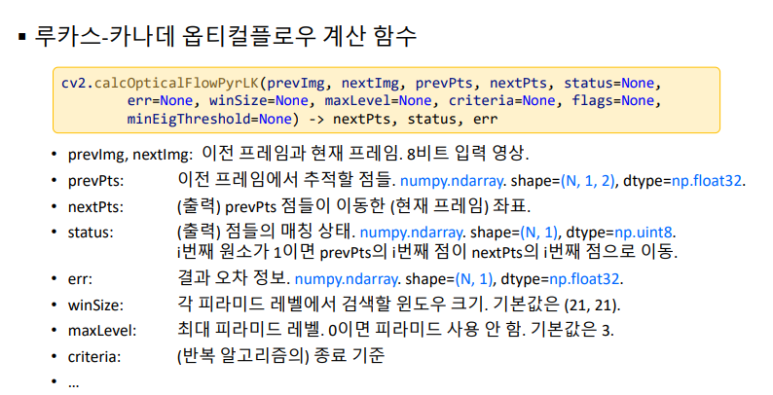

In [1]:
import sys 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import random 
!pip install opencv-python

In [11]:
cap = cv2.VideoCapture(0)


if not cap.isOpened():

    print('Camera open failed!')

    sys.exit()

In [12]:
MAX_COUNT = 1000 #최대 50개를 찾을 것이다.

needToInit = False

colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0),

          (0, 255, 255), (255, 0, 255), (128, 255, 0), (0, 128, 128)]

#8개의 컬러로 각각의 점들을 표현한다.

ptSrc = None

ptDst = None

In [13]:
while True:

    ret, frame = cap.read()


    if not ret:

        break


    img = frame.copy()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    if needToInit:

        ptSrc = cv2.goodFeaturesToTrack(gray, 50, 0.01, 10)
        #2. 코너점을 찾습니다.
        #입력이미지, 최대검출개수, 코너점 값, 코너점 값 최소거리

        needToInit = False


    if ptSrc is not None:

        if prev is None:

            prev = gray.copy()


        ptDst, status, _ = cv2.calcOpticalFlowPyrLK(prev, gray, ptSrc, None)
#이전프레임, 현재프레임, 위함수에서 구한 ptSRC

        for i in range(ptDst.shape[0]):

            if status[i, 0] == 0:

                continue


            cv2.circle(img, tuple(ptDst[i, 0]), 4, colors[i % 8], 2, cv2.LINE_AA)
                #출력 매칭 좌표에 원출력 매칭 좌표에 원
    cv2.imshow('frame', img)

    key = cv2.waitKey(1)


    if key == 27:

        break

    elif key == ord('r'): #키보드 r키를 누르면

        needToInit = not needToInit 
        #1. neetToInit이 True가 되며 if문에 걸리게 된다.

    elif key == ord('c'):

        ptSrc = None

        ptDst = None


    ptDst, ptSrc = ptSrc, ptDst

    prev = gray

cap.release()
cv2.destroyAllWindows()

<ipython-input-13-4a5ae2d0d612>:42: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(img, tuple(ptDst[i, 0]), 4, colors[i % 8], 2, cv2.LINE_AA)
